# 一、資料集介紹

資料集網址：[Covid Data](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)
預測問題：病患在確定得到 Covid Data 後是否會死亡
目標變數：DATE_DIED（紀錄病人死亡日期，如果沒有死亡則輸入 9999-99-99 表示。）

# 二、變數敘述統計＆資料前處理

## (一)、變數敘述統計

In [115]:
# 針對連續性變數做敘述統計
import pandas as pd

df = pd.read_csv("./covid_data.csv")
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [116]:
import pandas as pd

df = pd.read_csv("./covid_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [117]:
import pandas as pd

# 讀取資料集
df = pd.read_csv('covid_data.csv')

# 定義缺失值的條件（97 或 99）
missing_values = [97, 98, 99]

# 遍歷所有欄位，去除包含 97 或 99 的行
df_cleaned = df[~df.isin(missing_values).any(axis=1)]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76749 entries, 5 to 1048569
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 76749 non-null  int64 
 1   MEDICAL_UNIT          76749 non-null  int64 
 2   SEX                   76749 non-null  int64 
 3   PATIENT_TYPE          76749 non-null  int64 
 4   DATE_DIED             76749 non-null  object
 5   INTUBED               76749 non-null  int64 
 6   PNEUMONIA             76749 non-null  int64 
 7   AGE                   76749 non-null  int64 
 8   PREGNANT              76749 non-null  int64 
 9   DIABETES              76749 non-null  int64 
 10  COPD                  76749 non-null  int64 
 11  ASTHMA                76749 non-null  int64 
 12  INMSUPR               76749 non-null  int64 
 13  HIPERTENSION          76749 non-null  int64 
 14  OTHER_DISEASE         76749 non-null  int64 
 15  CARDIOVASCULAR        76749 non-null  i

In [118]:
# 將所有欄位類型列為字典
dtype_dict = {col: 'object' for col in df_cleaned.columns if col != 'AGE'}

# 使用 astype() 轉換資料類型
df_cleaned = df_cleaned.astype(dtype_dict)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76749 entries, 5 to 1048569
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 76749 non-null  object
 1   MEDICAL_UNIT          76749 non-null  object
 2   SEX                   76749 non-null  object
 3   PATIENT_TYPE          76749 non-null  object
 4   DATE_DIED             76749 non-null  object
 5   INTUBED               76749 non-null  object
 6   PNEUMONIA             76749 non-null  object
 7   AGE                   76749 non-null  int64 
 8   PREGNANT              76749 non-null  object
 9   DIABETES              76749 non-null  object
 10  COPD                  76749 non-null  object
 11  ASTHMA                76749 non-null  object
 12  INMSUPR               76749 non-null  object
 13  HIPERTENSION          76749 non-null  object
 14  OTHER_DISEASE         76749 non-null  object
 15  CARDIOVASCULAR        76749 non-null  o

In [119]:
# 建立 IS_DIED 欄位：判斷 DATE_DIED 是否為 '9999-99-99'，是的話表示病患沒有死亡（顯示 0，反之則為 1）
df_cleaned['IS_DIED'] = df_cleaned['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)
df_cleaned['IS_DIED'] = df_cleaned['IS_DIED'].astype('object')

# 捨棄 DATE_DIED 欄位
df_cleaned = df_cleaned.drop(columns=['DATE_DIED'])

df_cleaned["IS_DIED"].value_counts()

IS_DIED
0    52940
1    23809
Name: count, dtype: int64

In [120]:
# 針對類別型變數做敘述統計
import pandas as pd

pd.set_option('display.max_colwidth', None)

def generate_code_description(column):
    return ", ".join([f"{val}: {count}" for val, count in df_cleaned[column].value_counts().items()])

category_columns = df_cleaned.select_dtypes(include=['object']).columns
summary = pd.DataFrame({
    "Variable": category_columns,
    "Code": [generate_code_description(col) for col in category_columns],
})
summary

,Variable,Code
0,USMER,"1: 42080, 2: 34669"
1,MEDICAL_UNIT,"4: 36165, 12: 26005, 6: 5934, 9: 3141, 3: 1651, 8: 1225, 10: 1224, 5: 693, 11: 461, 7: 119, 13: 102, 2: 19, 1: 10"
2,SEX,1: 76749
3,PATIENT_TYPE,2: 76749
4,INTUBED,"2: 65111, 1: 11638"
5,PNEUMONIA,"1: 43579, 2: 33170"
6,PREGNANT,"2: 74957, 1: 1792"
7,DIABETES,"2: 52446, 1: 24303"
8,COPD,"2: 73031, 1: 3718"
9,ASTHMA,"2: 74066, 1: 2683"


## (二)、資料前處理

In [121]:
import pandas as pd
from scipy.stats import chi2_contingency

# 假設 df_cleaned 是目前的資料集
target_var = 'IS_DIED'

# 初始化列表來存儲卡方檢定結果
chi2_results = []

# 遍歷所有類別型欄位（排除目標變數 IS_DIED 本身）
for col in df_cleaned.select_dtypes(include='object').columns:
    if col != target_var:
        # 建立列聯表（Contingency Table）
        contingency_table = pd.crosstab(df_cleaned[col], df_cleaned[target_var])

        # 卡方檢定
        chi2, p, dof, _ = chi2_contingency(contingency_table)

        # 存儲結果
        chi2_results.append({
            'Feature': col,
            'Chi2 Statistic': chi2,
            'p-value': round(p, 10),
            'Significant (p < 0.05)': p < 0.05
        })

# 將結果整理為 DataFrame 並按 p-value 排序
chi2_results_df = pd.DataFrame(chi2_results).sort_values(by='p-value', ascending=True)
chi2_results_df


,Feature,Chi2 Statistic,p-value,Significant (p < 0.05)
0,USMER,227.752176,0.000000e+00,True
15,RENAL_CHRONIC,360.018659,0.000000e+00,True
14,OBESITY,215.454691,0.000000e+00,True
13,CARDIOVASCULAR,104.198497,0.000000e+00,True
11,HIPERTENSION,2428.562226,0.000000e+00,True
17,CLASIFFICATION_FINAL,5282.884017,0.000000e+00,True
8,COPD,187.846263,0.000000e+00,True
9,ASTHMA,52.049811,0.000000e+00,True
6,PREGNANT,621.412488,0.000000e+00,True
5,PNEUMONIA,3326.443461,0.000000e+00,True


In [122]:
# 清除卡方檢定不符合規定的欄位，並生成新的資料集
df_selected_cleaned = df_cleaned.copy()
for tmp in chi2_results:
    if not tmp.get("Significant (p < 0.05)"):
        df_selected_cleaned = df_selected_cleaned.drop(columns=[tmp.get("Feature")])

df_selected_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76749 entries, 5 to 1048569
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 76749 non-null  object
 1   MEDICAL_UNIT          76749 non-null  object
 2   INTUBED               76749 non-null  object
 3   PNEUMONIA             76749 non-null  object
 4   AGE                   76749 non-null  int64 
 5   PREGNANT              76749 non-null  object
 6   DIABETES              76749 non-null  object
 7   COPD                  76749 non-null  object
 8   ASTHMA                76749 non-null  object
 9   HIPERTENSION          76749 non-null  object
 10  OTHER_DISEASE         76749 non-null  object
 11  CARDIOVASCULAR        76749 non-null  object
 12  OBESITY               76749 non-null  object
 13  RENAL_CHRONIC         76749 non-null  object
 14  CLASIFFICATION_FINAL  76749 non-null  object
 15  ICU                   76749 non-null  o

In [123]:
df_cleaned.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,IS_DIED
5,2,1,1,2,2,1,40,2,2,2,...,2,2,2,2,2,2,2,3,2,0
8,2,1,1,2,2,2,37,2,1,2,...,2,1,2,2,1,2,2,3,2,0
9,2,1,1,2,2,2,25,2,2,2,...,2,2,2,2,2,2,2,3,2,0
16,2,1,1,2,2,1,80,2,2,2,...,2,1,2,2,2,2,2,3,1,0
56,2,1,1,2,1,1,58,2,2,2,...,2,1,2,1,1,2,2,7,1,0


In [124]:
dataset_a = pd.get_dummies(df_cleaned, dtype=int)
dataset_a

,AGE,USMER_1,USMER_2,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,...,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7,ICU_1,ICU_2,IS_DIED_0,IS_DIED_1
5,40,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
8,37,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
9,25,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
16,80,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
56,58,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048535,79,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1048553,61,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1048554,63,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1048567,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [125]:
dataset_b = pd.get_dummies(df_selected_cleaned, dtype=int)
dataset_b

,AGE,USMER_1,USMER_2,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,...,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7,ICU_1,ICU_2,IS_DIED_0,IS_DIED_1
5,40,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
8,37,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
9,25,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
16,80,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
56,58,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048535,79,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1048553,61,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1048554,63,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1048567,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


# 三、建立模型 - 決策樹

## (一)、Dataset A 決策樹

Random State 3 Selected Accuracy Matrix:
Depth Range: [6, 7, 8, 9, 10]
Leaf Nodes Range: [47, 48, 49, 50, 51, 52, 53]
[[79.76 79.73 79.71 79.72 79.72 79.72 79.72]
 [80.04 80.   80.   80.02 80.02 80.02 80.02]
 [80.19 80.13 80.13 80.13 80.13 80.13 80.13]
 [80.15 80.15 80.15 80.19 80.13 80.13 80.13]
 [80.16 80.16 80.16 80.16 80.16 80.16 80.16]]

Random State 30 Selected Accuracy Matrix:
Depth Range: [6, 7, 8, 9, 10]
Leaf Nodes Range: [47, 48, 49, 50, 51, 52, 53]
[[78.9  78.86 78.86 78.88 78.88 78.88 78.88]
 [79.01 79.01 79.01 79.01 79.   79.   79.03]
 [79.15 79.15 79.15 79.15 79.15 79.11 79.11]
 [79.19 79.19 79.15 79.17 79.24 79.24 79.24]
 [79.11 79.11 79.19 79.19 79.15 79.17 79.24]]

Random State 300 Selected Accuracy Matrix:
Depth Range: [6, 7, 8, 9, 10]
Leaf Nodes Range: [47, 48, 49, 50, 51, 52, 53]
[[79.23 79.23 79.23 79.23 79.27 79.27 79.26]
 [79.38 79.38 79.39 79.39 79.37 79.37 79.37]
 [79.48 79.48 79.48 79.48 79.48 79.48 79.48]
 [79.48 79.48 79.48 79.48 79.36 79.36 79.36]
 [79.36 7

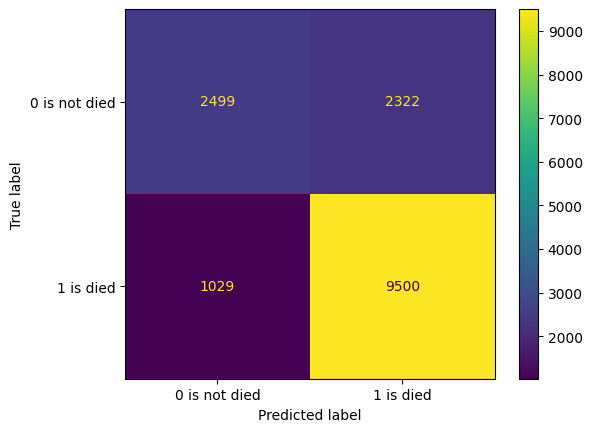

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


y = dataset_a['IS_DIED_0'].copy()
x = dataset_a.drop(columns=['IS_DIED_0', 'IS_DIED_1']).copy()
max_depth_range = range(1, 11)
max_leaf_nodes_range = range(2, 60)

# 分割數據 (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3
)

# 儲存各個 random_state 的結果
matrices = []  # 存放每個 random_state 的準確度矩陣
random_state_results = {}  # 存放每個 random_state 的結果

# 測試不同的 random_state
for random_state in [3, 30, 300]:
    x_train_tuning, x_valid, y_train_tuning, y_valid = train_test_split(
        x_train, y_train, test_size=0.2, random_state=random_state
    )

    # 建立一個空矩陣來存放準確度
    acc_matrix = np.zeros((len(max_depth_range), len(max_leaf_nodes_range)))

    for i, max_depth in enumerate(max_depth_range):
        for j, max_leaf_nodes in enumerate(max_leaf_nodes_range):
            # 初始化並訓練決策樹模型
            model_cart = DecisionTreeClassifier(
                criterion='gini',
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_leaf=1,
                random_state=4  # 固定隨機狀態以確保每次結果一致
            )
            model_cart.fit(x_train_tuning, y_train_tuning)  # 訓練模型

            # 預測並計算驗證準確度
            prediction = model_cart.predict(x_valid)
            valid_acc = accuracy_score(y_valid, prediction)
            acc_matrix[i, j] = valid_acc * 100  # 將準確度轉為百分比格式

    matrices.append(acc_matrix)
    random_state_results[random_state] = acc_matrix

# 計算平均矩陣
average_matrix = np.mean(matrices, axis=0)

# 找出平均矩陣的最佳值與其索引
max_avg_acc = average_matrix.max()
max_avg_idx = np.unravel_index(average_matrix.argmax(), average_matrix.shape)
best_avg_depth = max_depth_range[max_avg_idx[0]]
best_avg_leaf_nodes = max_leaf_nodes_range[max_avg_idx[1]]

# 篩選最佳結果的前後三筆資料
start_depth = max(0, max_avg_idx[0] - 3)
end_depth = min(len(max_depth_range), max_avg_idx[0] + 4)
start_leaf = max(0, max_avg_idx[1] - 3)
end_leaf = min(len(max_leaf_nodes_range), max_avg_idx[1] + 4)

selected_data = average_matrix[start_depth:end_depth, start_leaf:end_leaf]
selected_depth_range = list(max_depth_range)[start_depth:end_depth]
selected_leaf_range = list(max_leaf_nodes_range)[start_leaf:end_leaf]

# 印出每個 random_state 的結果（依照索引範圍篩選）
for random_state, matrix in random_state_results.items():
    selected_matrix = matrix[start_depth:end_depth, start_leaf:end_leaf]
    print(f"Random State {random_state} Selected Accuracy Matrix:")
    print("Depth Range:", selected_depth_range)
    print("Leaf Nodes Range:", selected_leaf_range)
    print(np.round(selected_matrix, 2))
    print()

# 印出平均矩陣與最佳參數
print("Averaged Accuracy Matrix (Selected Range):")
print("Depth Range:", selected_depth_range)
print("Leaf Nodes Range:", selected_leaf_range)
print(np.round(selected_data, 2))
print(f"\nBest Parameters Across All Random States:")
print(f"  Average Best max_depth: {best_avg_depth}")
print(f"  Average Best max_leaf_nodes: {best_avg_leaf_nodes}")
print(f"  Average Best Accuracy: {round(max_avg_acc, 2)}%")
print()


HHmodel=DecisionTreeClassifier(
    criterion='gini',
    max_depth=best_avg_depth,
    max_leaf_nodes=best_avg_leaf_nodes,
    min_samples_leaf=1,
    random_state=4
)
HHmodel.fit(x_train,y_train)
final_model_testing_prediction=HHmodel.predict(x_test)
final_model_testing_acc=accuracy_score(y_test,final_model_testing_prediction)
final_model_testing_f1s=f1_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre=precision_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen=recall_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe=recall_score(y_test,final_model_testing_prediction,pos_label=0)
final_model_testing_cm=confusion_matrix(y_test,final_model_testing_prediction)

#print result
print('Testing ACC:',round(final_model_testing_acc*100,2))
print('Testing f1s:',round(final_model_testing_f1s*100,2))
print('Testing pre:',round(final_model_testing_pre*100,2))
print('Testing sen:',round(final_model_testing_sen*100,2))
print('Testing spe:',round(final_model_testing_spe*100,2))
ConfusionMatrixDisplay(final_model_testing_cm,display_labels=["0 is not died","1 is died"]).plot()

## (二)、Dataset B 決策樹

Random State 3 Selected Accuracy Matrix:
Depth Range: [6, 7, 8, 9, 10]
Leaf Nodes Range: [47, 48, 49, 50, 51, 52, 53]
[[79.76 79.73 79.71 79.72 79.72 79.72 79.72]
 [80.04 80.   80.   80.02 80.02 80.02 80.02]
 [80.19 80.13 80.13 80.13 80.13 80.13 80.13]
 [80.15 80.15 80.15 80.19 80.13 80.13 80.13]
 [80.16 80.16 80.16 80.16 80.16 80.16 80.16]]

Random State 30 Selected Accuracy Matrix:
Depth Range: [6, 7, 8, 9, 10]
Leaf Nodes Range: [47, 48, 49, 50, 51, 52, 53]
[[78.9  78.86 78.86 78.88 78.88 78.88 78.88]
 [79.01 79.01 79.01 79.01 79.   79.   79.03]
 [79.15 79.15 79.15 79.15 79.15 79.11 79.11]
 [79.19 79.19 79.15 79.17 79.24 79.24 79.24]
 [79.11 79.11 79.19 79.19 79.15 79.17 79.24]]

Random State 300 Selected Accuracy Matrix:
Depth Range: [6, 7, 8, 9, 10]
Leaf Nodes Range: [47, 48, 49, 50, 51, 52, 53]
[[79.25 79.25 79.27 79.31 79.28 79.28 79.28]
 [79.38 79.38 79.39 79.39 79.37 79.37 79.37]
 [79.48 79.48 79.48 79.48 79.48 79.48 79.48]
 [79.48 79.48 79.48 79.48 79.36 79.36 79.36]
 [79.36 7

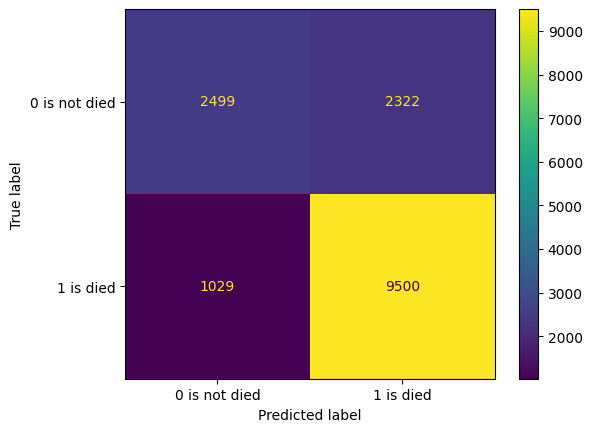

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


y = dataset_b['IS_DIED_0'].copy()
x = dataset_b.drop(columns=['IS_DIED_0', 'IS_DIED_1']).copy()
max_depth_range = range(1, 11)
max_leaf_nodes_range = range(2, 60)

# 分割數據 (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3
)

# 儲存各個 random_state 的結果
matrices = []  # 存放每個 random_state 的準確度矩陣
random_state_results = {}  # 存放每個 random_state 的結果

# 測試不同的 random_state
for random_state in [3, 30, 300]:
    x_train_tuning, x_valid, y_train_tuning, y_valid = train_test_split(
        x_train, y_train, test_size=0.2, random_state=random_state
    )

    # 建立一個空矩陣來存放準確度
    acc_matrix = np.zeros((len(max_depth_range), len(max_leaf_nodes_range)))

    for i, max_depth in enumerate(max_depth_range):
        for j, max_leaf_nodes in enumerate(max_leaf_nodes_range):
            # 初始化並訓練決策樹模型
            model_cart = DecisionTreeClassifier(
                criterion='gini',
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_leaf=1,
                random_state=4  # 固定隨機狀態以確保每次結果一致
            )
            model_cart.fit(x_train_tuning, y_train_tuning)  # 訓練模型

            # 預測並計算驗證準確度
            prediction = model_cart.predict(x_valid)
            valid_acc = accuracy_score(y_valid, prediction)
            acc_matrix[i, j] = valid_acc * 100  # 將準確度轉為百分比格式

    matrices.append(acc_matrix)
    random_state_results[random_state] = acc_matrix

# 計算平均矩陣
average_matrix = np.mean(matrices, axis=0)

# 找出平均矩陣的最佳值與其索引
max_avg_acc = average_matrix.max()
max_avg_idx = np.unravel_index(average_matrix.argmax(), average_matrix.shape)
best_avg_depth = max_depth_range[max_avg_idx[0]]
best_avg_leaf_nodes = max_leaf_nodes_range[max_avg_idx[1]]

# 篩選最佳結果的前後三筆資料
start_depth = max(0, max_avg_idx[0] - 3)
end_depth = min(len(max_depth_range), max_avg_idx[0] + 4)
start_leaf = max(0, max_avg_idx[1] - 3)
end_leaf = min(len(max_leaf_nodes_range), max_avg_idx[1] + 4)

selected_data = average_matrix[start_depth:end_depth, start_leaf:end_leaf]
selected_depth_range = list(max_depth_range)[start_depth:end_depth]
selected_leaf_range = list(max_leaf_nodes_range)[start_leaf:end_leaf]

# 印出每個 random_state 的結果（依照索引範圍篩選）
for random_state, matrix in random_state_results.items():
    selected_matrix = matrix[start_depth:end_depth, start_leaf:end_leaf]
    print(f"Random State {random_state} Selected Accuracy Matrix:")
    print("Depth Range:", selected_depth_range)
    print("Leaf Nodes Range:", selected_leaf_range)
    print(np.round(selected_matrix, 2))
    print()

# 印出平均矩陣與最佳參數
print("Averaged Accuracy Matrix (Selected Range):")
print("Depth Range:", selected_depth_range)
print("Leaf Nodes Range:", selected_leaf_range)
print(np.round(selected_data, 2))
print(f"\nBest Parameters Across All Random States:")
print(f"  Average Best max_depth: {best_avg_depth}")
print(f"  Average Best max_leaf_nodes: {best_avg_leaf_nodes}")
print(f"  Average Best Accuracy: {round(max_avg_acc, 2)}%")
print()


HHmodel=DecisionTreeClassifier(
    criterion='gini',
    max_depth=best_avg_depth,
    max_leaf_nodes=best_avg_leaf_nodes,
    min_samples_leaf=1,
    random_state=4
)
HHmodel.fit(x_train,y_train)
final_model_testing_prediction=HHmodel.predict(x_test)
final_model_testing_acc=accuracy_score(y_test,final_model_testing_prediction)
final_model_testing_f1s=f1_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre=precision_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen=recall_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe=recall_score(y_test,final_model_testing_prediction,pos_label=0)
final_model_testing_cm=confusion_matrix(y_test,final_model_testing_prediction)

#print result
print('Testing ACC:',round(final_model_testing_acc*100,2))
print('Testing f1s:',round(final_model_testing_f1s*100,2))
print('Testing pre:',round(final_model_testing_pre*100,2))
print('Testing sen:',round(final_model_testing_sen*100,2))
print('Testing spe:',round(final_model_testing_spe*100,2))
ConfusionMatrixDisplay(final_model_testing_cm,display_labels=["0 is not died","1 is died"]).plot()

# 四、建立模型 - SVM

## (一)、Dataset A SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np


y = dataset_a['IS_DIED_0'].copy()
x = dataset_a.drop(columns=['IS_DIED_0', 'IS_DIED_1']).copy()

scaler = MinMaxScaler()
scaling = scaler.fit_transform(x)
scaled_data = pd.DataFrame(data=scaling, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=3)

# 設定超參數範圍
C_values = [2 ** i for i in range(-5, 16)]  # C 值範圍 [2^-5, ..., 2^15]
degrees = range(1, 6)  # Degree 範圍 [1, ..., 2]

# 結果儲存矩陣 (每個 random_state 都有一個矩陣)
accuracy_matrices = {}

# 進行超參數調整
for random_state in [3, 30, 300]:
    x_train_tuning, x_valid, y_train_tuning, y_valid = train_test_split(
        x_train, y_train, test_size=0.2, random_state=random_state)

    # 建立空矩陣來儲存當前 random_state 的準確度 (len(C_values) x len(degrees))
    acc_matrix = np.zeros((len(C_values), len(degrees)))

    for i, c in enumerate(C_values):
        for j, degree in enumerate(degrees):
            # 初始化模型
            model = SVC(C=c, kernel='poly', degree=degree)
            model.fit(x_train_tuning, y_train_tuning)  # 訓練模型

            # 驗證模型
            prediction = model.predict(x_valid)
            valid_acc = accuracy_score(y_valid, prediction)

            # 儲存準確度至矩陣
            acc_matrix[i, j] = valid_acc * 100  # 轉為百分比格式

    # 四捨五入矩陣結果
    acc_matrix = np.round(acc_matrix, 2)
    accuracy_matrices[random_state] = acc_matrix

# 計算所有 random_state 準確度矩陣的平均
average_matrix = np.mean(list(accuracy_matrices.values()), axis=0)
average_matrix = np.round(average_matrix, 2)

# 印出每個 random_state 的準確度矩陣
print("\nAccuracy Matrices for Each Random State:")
for random_state, acc_matrix in accuracy_matrices.items():
    print(f"\nRandom State {random_state}:")
    print("C Values:", C_values)
    print("Degrees:", list(degrees))
    print(acc_matrix)

print("\nAverage Accuracy Matrix Across All Random States:")
print("C Values:", C_values)
print("Degrees:", list(degrees))
print(average_matrix)

# 找出平均準確度矩陣中的最大值及其索引
max_index = np.unravel_index(np.argmax(average_matrix, axis=None), average_matrix.shape)
best_c_index, best_degree_index = max_index

# 取得對應的最佳 C 和 degree 值
best_c = C_values[best_c_index]
best_degree = degrees[best_degree_index]

print(f"\nBest Hyperparameters:")
print(f"C = {best_c}")
print(f"Degree = {best_degree}")

# 訓練最終模型
final_model = SVC(C=best_c, kernel='poly', degree=best_degree)
final_model.fit(x_train, y_train)

# 測試集結果
final_prediction = final_model.predict(x_test)
final_acc = accuracy_score(y_test, final_prediction)
final_f1 = f1_score(y_test, final_prediction, pos_label=1)
final_precision = precision_score(y_test, final_prediction, pos_label=1)
final_recall = recall_score(y_test, final_prediction, pos_label=1)
final_specificity = recall_score(y_test, final_prediction, pos_label=0)
final_confusion_matrix = confusion_matrix(y_test, final_prediction)

# 印出測試結果
print("\nFinal Model Results:")
print(f"Testing Accuracy: {round(final_acc * 100, 2)}%")
print(f"Testing F1 Score: {round(final_f1 * 100, 2)}%")
print(f"Testing Precision: {round(final_precision * 100, 2)}%")
print(f"Testing Sensitivity: {round(final_recall * 100, 2)}%")
print(f"Testing Specificity: {round(final_specificity * 100, 2)}%")

ConfusionMatrixDisplay(final_confusion_matrix, display_labels=["0 is not died", "1 is died"]).plot()


## (二)、Dataset B SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np


y = dataset_b['IS_DIED_0'].copy()
x = dataset_b.drop(columns=['IS_DIED_0', 'IS_DIED_1']).copy()

scaler = MinMaxScaler()
scaling = scaler.fit_transform(x)
scaled_data = pd.DataFrame(data=scaling, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=3)

# 設定超參數範圍
C_values = [2 ** i for i in range(-5, 16)]  # C 值範圍 [2^-5, ..., 2^15]
degrees = range(1, 6)  # Degree 範圍 [1, ..., 2]

# 結果儲存矩陣 (每個 random_state 都有一個矩陣)
accuracy_matrices = {}

# 進行超參數調整
for random_state in [3, 30, 300]:
    x_train_tuning, x_valid, y_train_tuning, y_valid = train_test_split(
        x_train, y_train, test_size=0.2, random_state=random_state)

    # 建立空矩陣來儲存當前 random_state 的準確度 (len(C_values) x len(degrees))
    acc_matrix = np.zeros((len(C_values), len(degrees)))

    for i, c in enumerate(C_values):
        for j, degree in enumerate(degrees):
            # 初始化模型
            model = SVC(C=c, kernel='poly', degree=degree)
            model.fit(x_train_tuning, y_train_tuning)  # 訓練模型

            # 驗證模型
            prediction = model.predict(x_valid)
            valid_acc = accuracy_score(y_valid, prediction)

            # 儲存準確度至矩陣
            acc_matrix[i, j] = valid_acc * 100  # 轉為百分比格式

    # 四捨五入矩陣結果
    acc_matrix = np.round(acc_matrix, 2)
    accuracy_matrices[random_state] = acc_matrix

# 計算所有 random_state 準確度矩陣的平均
average_matrix = np.mean(list(accuracy_matrices.values()), axis=0)
average_matrix = np.round(average_matrix, 2)

# 印出每個 random_state 的準確度矩陣
print("\nAccuracy Matrices for Each Random State:")
for random_state, acc_matrix in accuracy_matrices.items():
    print(f"\nRandom State {random_state}:")
    print("C Values:", C_values)
    print("Degrees:", list(degrees))
    print(acc_matrix)

print("\nAverage Accuracy Matrix Across All Random States:")
print("C Values:", C_values)
print("Degrees:", list(degrees))
print(average_matrix)

# 找出平均準確度矩陣中的最大值及其索引
max_index = np.unravel_index(np.argmax(average_matrix, axis=None), average_matrix.shape)
best_c_index, best_degree_index = max_index

# 取得對應的最佳 C 和 degree 值
best_c = C_values[best_c_index]
best_degree = degrees[best_degree_index]

print(f"\nBest Hyperparameters:")
print(f"C = {best_c}")
print(f"Degree = {best_degree}")

# 訓練最終模型
final_model = SVC(C=best_c, kernel='poly', degree=best_degree)
final_model.fit(x_train, y_train)

# 測試集結果
final_prediction = final_model.predict(x_test)
final_acc = accuracy_score(y_test, final_prediction)
final_f1 = f1_score(y_test, final_prediction, pos_label=1)
final_precision = precision_score(y_test, final_prediction, pos_label=1)
final_recall = recall_score(y_test, final_prediction, pos_label=1)
final_specificity = recall_score(y_test, final_prediction, pos_label=0)
final_confusion_matrix = confusion_matrix(y_test, final_prediction)

# 印出測試結果
print("\nFinal Model Results:")
print(f"Testing Accuracy: {round(final_acc * 100, 2)}%")
print(f"Testing F1 Score: {round(final_f1 * 100, 2)}%")
print(f"Testing Precision: {round(final_precision * 100, 2)}%")
print(f"Testing Sensitivity: {round(final_recall * 100, 2)}%")
print(f"Testing Specificity: {round(final_specificity * 100, 2)}%")

ConfusionMatrixDisplay(final_confusion_matrix, display_labels=["0 is not died", "1 is died"]).plot()


# 五、建立模型 - KNN

## (一)、Dataset A KNN


Accuracy Matrices for Each Random State:

Random State 3:
n_neighbors Range: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[71.45 68.67 75.72 74.61 76.95 76.12 77.84 77.35 78.12 77.7  78.53 78.14
 78.73 78.49 78.79 78.51 78.83 78.73 79.08 78.92 79.25 79.22 79.4  79.15
 79.3  79.27 79.19 79.28 79.45 79.42]

Random State 30:
n_neighbors Range: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[72.05 68.6  74.97 73.88 76.43 75.77 76.97 76.7  77.94 77.67 78.08 77.79
 78.27 78.23 78.17 78.14 78.21 78.18 78.33 78.35 78.36 78.44 78.5  78.51
 78.46 78.6  78.39 78.49 78.47 78.49]

Random State 300:
n_neighbors Range: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[71.69 68.43 75.08 74.18 76.78 75.88 77.74 77.19 77.91 77.4  78.44 77.92
 78.44 78.06 78.31 78.23 78.67 78.57 78.88 78.64 79.18 79.09 79.1  79.

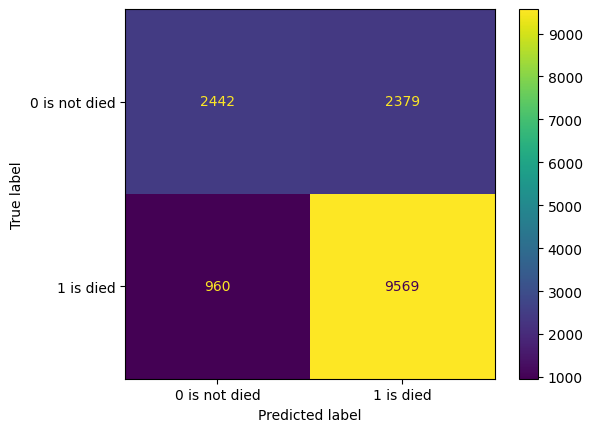

In [130]:
# 修改後的程式碼
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# 資料準備
y = dataset_a['IS_DIED_0'].copy()
x = dataset_a.drop(columns=['IS_DIED_0', 'IS_DIED_1']).copy()

scaler = MinMaxScaler()
scaling = scaler.fit_transform(x)
scaled_data = pd.DataFrame(data=scaling, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=3)

# 設定超參數範圍
n_neighbors_range = range(1, 31)  # 鄰居數範圍

# 結果儲存矩陣 (每個 random_state 都有一個矩陣)
accuracy_matrices = {}

# 進行超參數調整
for random_state in [3, 30, 300]:
    x_train_tuning, x_valid, y_train_tuning, y_valid = train_test_split(
        x_train, y_train, test_size=0.2, random_state=random_state)

    # 建立空矩陣來儲存當前 random_state 的準確度 (len(n_neighbors_range))
    acc_matrix = np.zeros(len(n_neighbors_range))

    for i, n_neighbors in enumerate(n_neighbors_range):
        # 初始化模型
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(x_train_tuning, y_train_tuning)  # 訓練模型

        # 驗證模型
        prediction = model.predict(x_valid)
        valid_acc = accuracy_score(y_valid, prediction)

        # 儲存準確度至矩陣
        acc_matrix[i] = valid_acc * 100  # 轉為百分比格式

    # 四捨五入矩陣結果
    acc_matrix = np.round(acc_matrix, 2)
    accuracy_matrices[random_state] = acc_matrix

# 計算所有 random_state 準確度矩陣的平均
average_matrix = np.mean(list(accuracy_matrices.values()), axis=0)
average_matrix = np.round(average_matrix, 2)

# 印出每個 random_state 的準確度矩陣
print("\nAccuracy Matrices for Each Random State:")
for random_state, acc_matrix in accuracy_matrices.items():
    print(f"\nRandom State {random_state}:")
    print("n_neighbors Range:", list(n_neighbors_range))
    print(acc_matrix)

print("\nAverage Accuracy Matrix Across All Random States:")
print("n_neighbors Range:", list(n_neighbors_range))
print(average_matrix)

# 找出平均準確度矩陣中的最大值及其索引
best_n_neighbors_index = np.argmax(average_matrix)

# 取得對應的最佳 n_neighbors 值
best_n_neighbors = list(n_neighbors_range)[best_n_neighbors_index]

print(f"\nBest Hyperparameters:")
print(f"n_neighbors = {best_n_neighbors}")

# 訓練最終模型
final_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
final_model.fit(x_train, y_train)

# 測試集結果
final_prediction = final_model.predict(x_test)
final_acc = accuracy_score(y_test, final_prediction)
final_f1 = f1_score(y_test, final_prediction, pos_label=1)
final_precision = precision_score(y_test, final_prediction, pos_label=1)
final_recall = recall_score(y_test, final_prediction, pos_label=1)
final_specificity = recall_score(y_test, final_prediction, pos_label=0)
final_confusion_matrix = confusion_matrix(y_test, final_prediction)

# 印出測試結果
print("\nFinal Model Results:")
print(f"Testing Accuracy: {round(final_acc * 100, 2)}%")
print(f"Testing F1 Score: {round(final_f1 * 100, 2)}%")
print(f"Testing Precision: {round(final_precision * 100, 2)}%")
print(f"Testing Sensitivity: {round(final_recall * 100, 2)}%")
print(f"Testing Specificity: {round(final_specificity * 100, 2)}%")

ConfusionMatrixDisplay(final_confusion_matrix, display_labels=["0 is not died", "1 is died"]).plot()


## (二)、Dataset B KNN


Accuracy Matrices for Each Random State:

Random State 3:
n_neighbors Range: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[71.68 68.93 75.62 74.39 77.17 76.23 78.05 77.39 78.57 78.12 78.96 78.53
 78.93 78.64 79.16 78.69 79.05 78.84 79.06 78.95 79.34 79.23 79.2  79.28
 79.37 79.39 79.35 79.34 79.32 79.44]

Random State 30:
n_neighbors Range: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[71.75 68.44 74.93 73.87 76.56 76.15 77.21 76.77 77.8  77.66 77.97 77.83
 78.16 78.2  78.38 78.46 78.36 78.36 78.36 78.28 78.42 78.43 78.41 78.44
 78.27 78.47 78.44 78.47 78.38 78.29]

Random State 300:
n_neighbors Range: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[71.73 68.29 75.27 74.44 76.69 75.71 77.67 77.13 78.   77.74 78.45 78.
 78.56 78.28 78.36 78.52 78.72 78.6  78.87 78.74 78.86 78.84 79.23 79.2


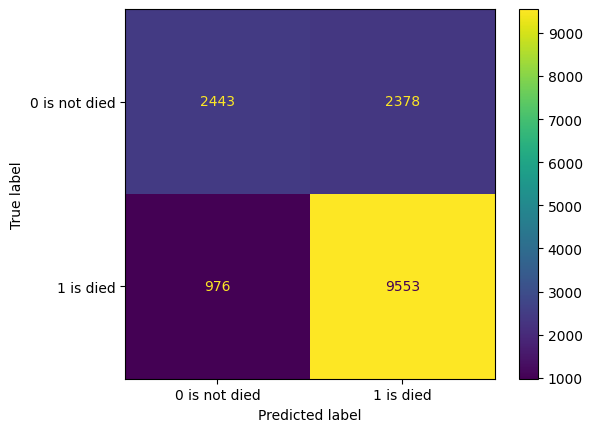

In [131]:
# 修改後的程式碼
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# 資料準備
y = dataset_b['IS_DIED_0'].copy()
x = dataset_b.drop(columns=['IS_DIED_0', 'IS_DIED_1']).copy()

scaler = MinMaxScaler()
scaling = scaler.fit_transform(x)
scaled_data = pd.DataFrame(data=scaling, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=3)

# 設定超參數範圍
n_neighbors_range = range(1, 31)  # 鄰居數範圍

# 結果儲存矩陣 (每個 random_state 都有一個矩陣)
accuracy_matrices = {}

# 進行超參數調整
for random_state in [3, 30, 300]:
    x_train_tuning, x_valid, y_train_tuning, y_valid = train_test_split(
        x_train, y_train, test_size=0.2, random_state=random_state)

    # 建立空矩陣來儲存當前 random_state 的準確度 (len(n_neighbors_range))
    acc_matrix = np.zeros(len(n_neighbors_range))

    for i, n_neighbors in enumerate(n_neighbors_range):
        # 初始化模型
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(x_train_tuning, y_train_tuning)  # 訓練模型

        # 驗證模型
        prediction = model.predict(x_valid)
        valid_acc = accuracy_score(y_valid, prediction)

        # 儲存準確度至矩陣
        acc_matrix[i] = valid_acc * 100  # 轉為百分比格式

    # 四捨五入矩陣結果
    acc_matrix = np.round(acc_matrix, 2)
    accuracy_matrices[random_state] = acc_matrix

# 計算所有 random_state 準確度矩陣的平均
average_matrix = np.mean(list(accuracy_matrices.values()), axis=0)
average_matrix = np.round(average_matrix, 2)

# 印出每個 random_state 的準確度矩陣
print("\nAccuracy Matrices for Each Random State:")
for random_state, acc_matrix in accuracy_matrices.items():
    print(f"\nRandom State {random_state}:")
    print("n_neighbors Range:", list(n_neighbors_range))
    print(acc_matrix)

print("\nAverage Accuracy Matrix Across All Random States:")
print("n_neighbors Range:", list(n_neighbors_range))
print(average_matrix)

# 找出平均準確度矩陣中的最大值及其索引
best_n_neighbors_index = np.argmax(average_matrix)

# 取得對應的最佳 n_neighbors 值
best_n_neighbors = list(n_neighbors_range)[best_n_neighbors_index]

print(f"\nBest Hyperparameters:")
print(f"n_neighbors = {best_n_neighbors}")

# 訓練最終模型
final_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
final_model.fit(x_train, y_train)

# 測試集結果
final_prediction = final_model.predict(x_test)
final_acc = accuracy_score(y_test, final_prediction)
final_f1 = f1_score(y_test, final_prediction, pos_label=1)
final_precision = precision_score(y_test, final_prediction, pos_label=1)
final_recall = recall_score(y_test, final_prediction, pos_label=1)
final_specificity = recall_score(y_test, final_prediction, pos_label=0)
final_confusion_matrix = confusion_matrix(y_test, final_prediction)

# 印出測試結果
print("\nFinal Model Results:")
print(f"Testing Accuracy: {round(final_acc * 100, 2)}%")
print(f"Testing F1 Score: {round(final_f1 * 100, 2)}%")
print(f"Testing Precision: {round(final_precision * 100, 2)}%")
print(f"Testing Sensitivity: {round(final_recall * 100, 2)}%")
print(f"Testing Specificity: {round(final_specificity * 100, 2)}%")

ConfusionMatrixDisplay(final_confusion_matrix, display_labels=["0 is not died", "1 is died"]).plot()
